<a href="https://colab.research.google.com/github/emms204/Alvin-Smart-Money-Management-Classification-Challenge/blob/main/Alvinapp_competition_Starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlvinApp Competition

##Alvin is a Kenyan personal finance company building money management widgets optimized for African contexts. They'd like to use the classification assessments that Alvin users have classified manually so far to produce a machine learning model that recommends categorizations for future transactions Alvin users make at new merchants.

This is a simple starter notebook to get started with the AvinApp Competition on Zindi.

This notebook covers:

*   Loading the data
*   Simple Exploratory Data Analysis and an example of feature engineering
*   Data preprocessing and data wrangling
*   Creating a simple model
*   Making a submission
*   Some tips for improving your score







## Importing libraries

In [ ]:
# Dataframe and Plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


pd.set_option('display.max_columns', None)
# from google.colab import files
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset

In [ ]:
# Testing path
# path = '/content/drive/MyDrive/Colab Notebooks/alvinapp/'
path = "/content/"

In [ ]:
# Load the files into a Pandas Dataframe
train = pd.read_csv(path+'Train.csv',parse_dates=['MERCHANT_CATEGORIZED_AT','PURCHASED_AT'])
test = pd.read_csv(path+'Test.csv',parse_dates=['MERCHANT_CATEGORIZED_AT','PURCHASED_AT'])
ss = pd.read_csv(path+'SampleSubmission.csv')

In [ ]:
ext_data = pd.read_csv('/content/extra_data.csv')

In [ ]:
# Let’s observe the shape of our datasets.
print('Train data shape :', train.shape)
print('Test data shape :', test.shape)
print('Extra data shape :', ext_data.shape)

Train data shape : (373, 12)
Test data shape : (558, 11)
Extra data shape : (10000, 12)


The above output shows the number of rows and columns for train and test dataset. We have 12 variables in the train dataset, 11 independent variables and 1 dependent variable. In the test dataset, we have 11 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [ ]:
pd.set_option('display.max_colwidth',200)
var_def = pd.read_csv('/content/VariableDefinitions.csv')
var_def

,COLUMN_NAME,COLUMN_DEFINATION
0,MERCHANT_CATEGORIZED_AT,The time the merchant was categorized by the customer
1,MERCHANT_NAME,The name of the merchant
2,MERCHANT_CATEGORIZED_AS,The category the merchant was assigned by the customer
3,PURCHASE_VALUE,The value of the purchase made by the customer
4,PURCHASED_AT,The time the purchase was made
5,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,If true indicates that the merchant is not a registered business name
6,USER_EMAIL,The email of the customer
7,USER_AGE,The age of the customer
8,USER_GENDER,The gender of the customer
9,USER_HOUSEHOLD,The number of family members


In [ ]:
# Inspect the training data
train.head(10)

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00:00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00:00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00:00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00:00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00:00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00:00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00:00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00:00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00:00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00:00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb
5,2022-01-07 09:41:44.286084+00:00,JOSEPH NTHENGE,Miscellaneous,14800,2022-01-08 12:56:00+00:00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_0ntvo3wr
6,2021-10-05 12:45:58.000193+00:00,NAIVAS KITENGELA,Groceries,657,2021-10-06 17:11:00+00:00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_0vakiykh
7,2022-05-13 06:55:53.403538+00:00,FATUMA OSORE,Bills & Fees,100,2022-05-13 14:04:00+00:00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0vhidyto
8,2022-05-31 13:27:24.704992+00:00,FARMERS BUTCHERY,Shopping,1600,2022-02-19 10:34:00+00:00,False,NaN,Male,5,150000,ID_O8P8YS18,ID_0wnir1ur
9,2022-06-01 10:25:16.713100+00:00,M-SHWARI ACCOUNT,Bills & Fees,1000,2022-06-02 06:42:00+00:00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0xrs122b


In [ ]:
ext_data.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,NaN,ACCESS AFYA,NaN,1,2021-07-05 11:07:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_rgne8ij5
2,NaN,POA,NaN,1500,2021-06-21 19:40:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_4i2b28b6
3,NaN,POA,NaN,1500,2021-04-22 18:41:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_6dvi32yc
4,NaN,ACCESS AFYA,NaN,1,2021-07-29 13:03:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_sfk1yxbm


In [ ]:
ext_data.isnull().sum()

MERCHANT_CATEGORIZED_AT                  10000
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                  10000
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                  8842
USER_GENDER                                 34
USER_HOUSEHOLD                               0
USER_INCOME                                  0
USER_ID                                      0
Transaction_ID                               0
dtype: int64

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of what our submission file should look like. This file will contain the unique id column combined with the merchant name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.

In [ ]:
# View the submission file
ss.head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_01db594f,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_07pm99no,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ID_09jryhkd,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ID_0ccv924c,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Understand the dataset

Let's look at a bar graph of the train data.

<BarContainer object of 373 artists>

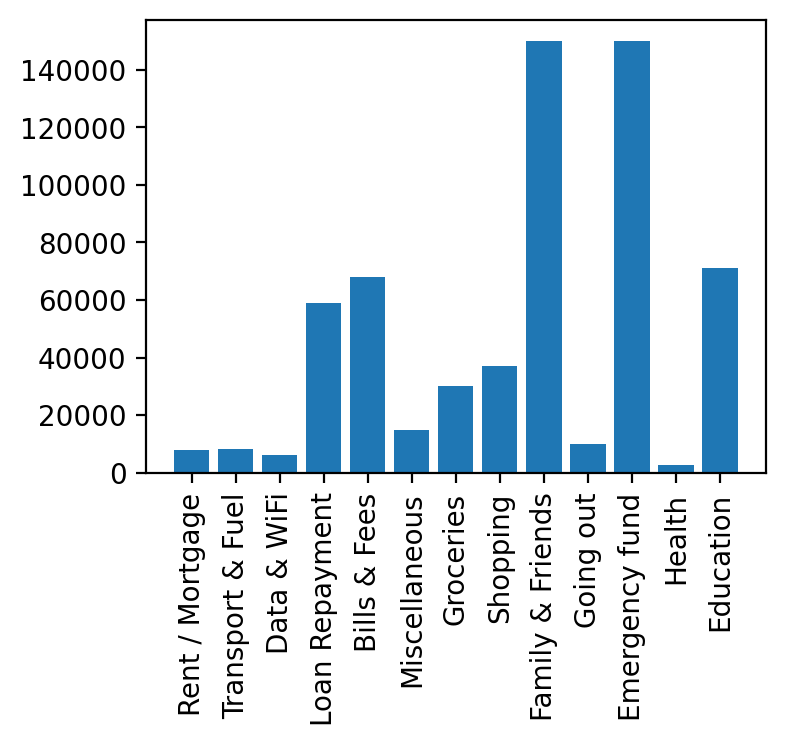

In [ ]:
# Show a bar graph of the purchase_value vs the target in the train data (merchant_categorized_as)
plt.figure(dpi=200, figsize=(4,3))
plt.xticks(rotation=90)
plt.bar(data=train, x='MERCHANT_CATEGORIZED_AS', height='PURCHASE_VALUE')

It's interesting to note that more money was spent on education than bills & fees, emergency fund, rent/mortgage and loan repayment.

Also very little was spent on health and transport & fuel.

Let's look at more detail by running the .info method

The output shows the list of variables/features, sizes, if it contains missing values and the data type for each variable. We have 3 features of the integer data type, 6 features of the object data type, 1 of the boolean data type and 1 of the float data type.

If you want to learn how to handle missing data in your dataset, we recommend you read [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

For more information you can visit the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

Encode the target labels to values to show a correlation matrix.

In [ ]:
# Use a dictionary comprehension and zip to create a dictionary for all the categories in the train data
labels_train = train['MERCHANT_CATEGORIZED_AS'].astype('category').cat.categories.tolist()
replace_map_train = {'MERCHANT_CATEGORIZED_AS' : {k: v for k,v in zip(labels_train,list(range(1,len(labels_train)+1)))}}
print("Train data: ", replace_map_train)

Train data:  {'MERCHANT_CATEGORIZED_AS': {'Bills & Fees': 1, 'Data & WiFi': 2, 'Education': 3, 'Emergency fund': 4, 'Family & Friends': 5, 'Going out': 6, 'Groceries': 7, 'Health': 8, 'Loan Repayment': 9, 'Miscellaneous': 10, 'Rent / Mortgage': 11, 'Shopping': 12, 'Transport & Fuel': 13}}


In [ ]:
train_data_corr = train.copy()

In [ ]:
# Replace the categories with the numerical equivalents from the dictionary
train_data_corr.replace(replace_map_train, inplace=True)

Correlation matrix

In [ ]:
train_data_corr[train_data_corr.columns[1:]].corr()['MERCHANT_CATEGORIZED_AS'].sort_values()

IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY   -0.086870
PURCHASE_VALUE                          -0.074565
USER_HOUSEHOLD                          -0.012197
USER_INCOME                              0.041954
USER_AGE                                 0.143406
MERCHANT_CATEGORIZED_AS                  1.000000
Name: MERCHANT_CATEGORIZED_AS, dtype: float64

We can see that not many things are correlated with MERCHANT_CATEGORIZED_AS, so it seems like we don't have enough data.

We need to drop empty rows if there are any.

In [ ]:
train.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                    0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 312
USER_GENDER                                6
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [ ]:
test.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 473
USER_GENDER                                5
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [ ]:
ext_data.isnull().sum()

MERCHANT_CATEGORIZED_AT                  10000
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                  10000
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                  8842
USER_GENDER                                 34
USER_HOUSEHOLD                               0
USER_INCOME                                  0
USER_ID                                      0
Transaction_ID                               0
dtype: int64

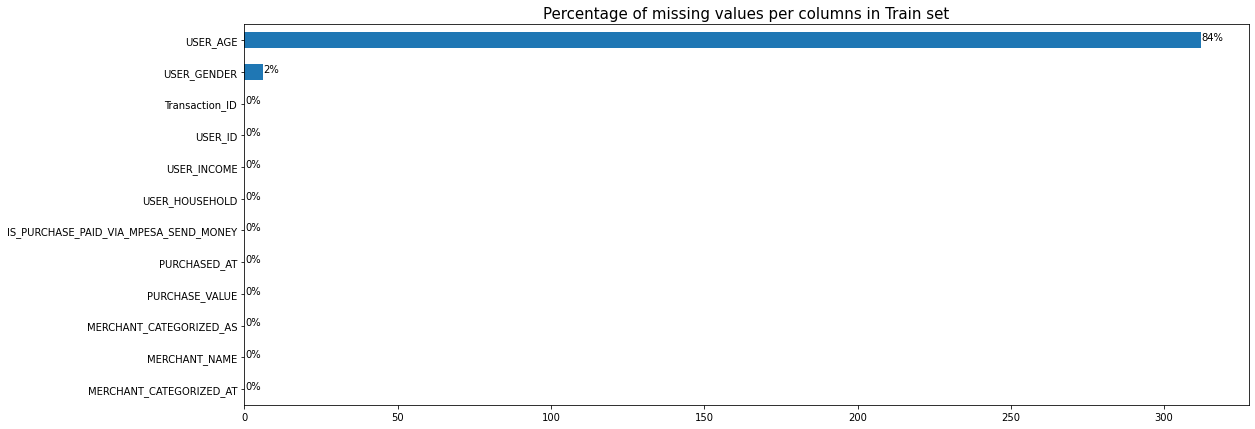

In [ ]:
ax = train.isna().sum().sort_values().plot(kind='barh', figsize=(18,7))
plt.title('Percentage of missing values per columns in Train set', fontdict={'size':15})
for p in ax.patches:
  percentage = '{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
  width, height = p.get_width(), p.get_height()
  x = p.get_x()+width+0.2  
  y = p.get_y()+height/2
  ax.annotate(percentage,(x,y))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   MERCHANT_CATEGORIZED_AT                373 non-null    datetime64[ns, UTC]
 1   MERCHANT_NAME                          373 non-null    object             
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object             
 3   PURCHASE_VALUE                         373 non-null    int64              
 4   PURCHASED_AT                           373 non-null    datetime64[ns, UTC]
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool               
 6   USER_AGE                               61 non-null     float64            
 7   USER_GENDER                            367 non-null    object             
 8   USER_HOUSEHOLD                         373 non-null    int64              
 9   USER_INCOM

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   MERCHANT_CATEGORIZED_AT                558 non-null    datetime64[ns, UTC]
 1   MERCHANT_NAME                          558 non-null    object             
 2   PURCHASE_VALUE                         558 non-null    int64              
 3   PURCHASED_AT                           558 non-null    datetime64[ns, UTC]
 4   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  558 non-null    bool               
 5   USER_AGE                               85 non-null     float64            
 6   USER_GENDER                            553 non-null    object             
 7   USER_HOUSEHOLD                         558 non-null    int64              
 8   USER_INCOME                            558 non-null    int64              
 9   USER_ID   

We can see that the number of entries in Age for the Test set don't correspond to the rest of its entries and for the Train set there are missing entries for Age and for Gender, which means we have some missing values.

In [ ]:
# We can also use the .isnull() method to check for empty values
print('Missing values for Train:', train.isnull().sum())
print('')
print('Missing values for Test:', test.isnull().sum())

Missing values for Train: MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                    0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 312
USER_GENDER                                6
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

Missing values for Test: MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 473
USER_GENDER                                5
USER_HOUSEHOLD                             0
USER_INCOME                        

There are 4 missing Gender entries and 329 missing Age entries in the train data and 591 missing Age entries for the test data.

In [ ]:
train[train['USER_GENDER'].isnull()]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
35,2021-11-30 10:51:36.702996+00:00,IDEAL APPLIANCES,Bills & Fees,24995,2021-05-06 14:14:00+00:00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_3xlptxy6
137,2021-11-30 10:52:38.553994+00:00,QUICK MART,Shopping,3298,2021-06-19 15:05:00+00:00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_dhp3d403
280,2021-08-06 11:28:03.723042+00:00,EQUITY PAYBILL,Shopping,4000,2021-07-25 10:54:00+00:00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_qvgzrt0r
309,2021-11-30 10:52:38.553994+00:00,NAOMI WANJOHI,Family & Friends,1028,2021-05-13 14:28:00+00:00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_u02b0hl6
312,2021-11-30 10:51:36.702996+00:00,POA,Data & WiFi,1500,2021-07-21 17:46:00+00:00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_uvhgthza
361,2021-11-30 10:51:36.702996+00:00,MIRIAM MUNGAI,Family & Friends,1600,2021-06-11 18:25:00+00:00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_yxz5etfz


In [ ]:
test[test['USER_GENDER'].isnull()]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
124,2021-08-06 11:28:16.857538+00:00,ACCESS AFYA,1,2021-08-05 09:32:00+00:00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_8oyhw5j0
138,2021-11-30 10:51:36.702996+00:00,PETER INDIMULI,1028,2021-04-08 12:07:00+00:00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_9au0g3qv
374,2021-11-30 10:51:36.702996+00:00,MICHELLE RODROT,827,2021-07-22 13:36:00+00:00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_p5ajidvp
395,2021-11-30 10:51:36.702996+00:00,DORCAS WANJOHI,2600,2021-06-07 14:05:00+00:00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_qd7dgqor
550,2021-11-30 10:52:38.553994+00:00,POA,1500,2021-05-22 19:11:00+00:00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_zqi8lti6


### Empty entries

By further investigation we see that the empty gender entries in the train set are all for one user: ID_R4T8Q46J in both train and test, therefore we can fill the gender with a value

In [ ]:
train.USER_GENDER.value_counts()

Male      197
Female    170
Name: USER_GENDER, dtype: int64

In [ ]:
test.USER_GENDER.value_counts()

Male      307
Female    246
Name: USER_GENDER, dtype: int64

Male value seems to be the most common, therefore we'll fill the missing value with male

In [ ]:
train["USER_GENDER"] = train["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)
test["USER_GENDER"] = test["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)

Let's see how this affected our shape

In [ ]:
train.shape

(373, 12)

We have various options with regards to filling in the missing values for AGE.
Let's impute these values with the median

In [ ]:
# Impute the missing age entries with the median of that column
train_median_value = np.median(train['USER_AGE'].dropna())
train['USER_AGE'] = train['USER_AGE'].fillna(train_median_value)

test_median_value = np.median(test['USER_AGE'].dropna())
test['USER_AGE'] = test['USER_AGE'].fillna(test_median_value)

In [ ]:
# Check that it's done
train.isna().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [ ]:
test.isna().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

### One-hot encode

Now we need to do some other changes before we can run the metrics.
One-hot encode MERCHANT_NAME so we can run metrics.

To ensure uniformity across train and test, we will merge both dataset then perform 1 hot encode

##FEATURE ENGINEERING

In [ ]:
train["train"] = 1
test["train"] = 0

In [ ]:
all_data = pd.concat([train, test]).reset_index(drop=True)

In [ ]:
var_def

,COLUMN_NAME,COLUMN_DEFINATION
0,MERCHANT_CATEGORIZED_AT,The time the merchant was categorized by the customer
1,MERCHANT_NAME,The name of the merchant
2,MERCHANT_CATEGORIZED_AS,The category the merchant was assigned by the customer
3,PURCHASE_VALUE,The value of the purchase made by the customer
4,PURCHASED_AT,The time the purchase was made
5,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,If true indicates that the merchant is not a registered business name
6,USER_EMAIL,The email of the customer
7,USER_AGE,The age of the customer
8,USER_GENDER,The gender of the customer
9,USER_HOUSEHOLD,The number of family members


In [ ]:
all_data['week'] = all_data['PURCHASED_AT'].dt.week

In [ ]:
all_data['MERCHANT_NAME'] = all_data.apply(lambda x:' '.join(x['MERCHANT_NAME'].split()),axis=1)

In [ ]:
all_data['len_char'] = all_data.apply(lambda x:len(x['MERCHANT_NAME'].replace(" ","")),axis=1)
all_data['len_word'] = all_data.apply(lambda x:len(x['MERCHANT_NAME'].split()),axis=1)
all_data['len_sent'] = all_data.apply(lambda x:len(x['MERCHANT_NAME']),axis=1)
all_data['len_unique'] = all_data.apply(lambda x:(len(set(x['MERCHANT_NAME']))-1),axis=1)

In [ ]:
all_data['avg_wordlength'] = all_data['len_char']/all_data['len_word']
all_data['avg_sentlength'] = all_data['len_word']/all_data['len_sent']
all_data['unique_vs_words'] = all_data['len_unique']/all_data['len_word']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1),stop_words={'english'})
vectorized = vectorizer.fit_transform(all_data['MERCHANT_NAME'])
all_data_cf_idf = pd.DataFrame(vectorized.toarray(),columns=vectorizer.get_feature_names())

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 1),stop_words={'english'})
# vectorized = vectorizer.fit_transform(all_data['MERCHANT_NAME'])
# all_data_cf_idf = pd.DataFrame(vectorized.toarray(),columns=vectorizer.get_feature_names())

In [ ]:
all_data = pd.merge(all_data,all_data_cf_idf,left_index=True, right_index=True)

In [ ]:
ce all_data.MERCHANT_NAME.value_counts()

SAFARICOM OFFERS TUNUKIWA    27
PETER KENDA                  24
FATUMA OSORE                 23
M-SHWARI ACCOUNT             22
KPLC PREPAID                 20
                             ..
TOTAL K STATE HOUSE- SHOP     1
LEILA KAINGU                  1
PIZZA IN BELLEVUE             1
RODGERS SIMIYU                1
DECATHLON HUB TILL 5          1
Name: MERCHANT_NAME, Length: 438, dtype: int64

In [ ]:
all_data['MERCHANT_CATEGORIZED_AS'].unique

array(['Rent / Mortgage', 'Transport & Fuel', 'Data & WiFi',
       'Loan Repayment', 'Bills & Fees', 'Miscellaneous', 'Groceries',
       'Shopping', 'Family & Friends', 'Going out', 'Emergency fund',
       'Health', 'Education', nan], dtype=object)

In [ ]:
all_data['MERCHANT_CATEGORIZED_AS'].value_counts()

Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [ ]:
all_data['Frequency_per_merchant'] = all_data.groupby(['USER_ID','MERCHANT_NAME'])[['Transaction_ID']].transform('count')
all_data['Mean_Purchase_per_merchant'] = all_data.groupby(['MERCHANT_NAME'])[['PURCHASE_VALUE']].transform('mean')

In [ ]:
#all_data['Threshold_max'] = all_data.groupby(['MERCHANT_NAME'])[['PURCHASE_VALUE']].transform('max')
all_data['Threshold_min'] = all_data.groupby(['MERCHANT_NAME'])[['PURCHASE_VALUE']].transform('min')
#all_data['Threshold_mean'] = all_data.groupby(['MERCHANT_NAME'])[['PURCHASE_VALUE']].transform('mean')

In [ ]:
from textblob import TextBlob
# functions to get polatiy and subjectivity of text using the module textblob
def get_polarity(text):
    try:
        textblob = TextBlob(text)
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

def get_subjectivity(text):
    try:
        textblob = TextBlob(text)
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj


# change df_small to df to create these features on complete dataframe
all_data['polarity'] = all_data['MERCHANT_NAME'].apply(get_polarity)
all_data['subjectivity'] = all_data['MERCHANT_NAME'].apply(get_subjectivity)

In [ ]:
!pip install category_encoders
import category_encoders as ce
def target_encode_multiclass(X,y):
  #X,y are pandas df and series
  y=y.astype(str)   #convert to string to onehot encode
  enc=ce.OneHotEncoder().fit(y)
  y_onehot=enc.transform(y)
  class_names=y_onehot.columns  #names of onehot encoded columns
  X_obj=X.select_dtypes('object') #separate categorical columns
  X=X.select_dtypes(exclude='object') 
  for class_ in class_names:
    enc=ce.TargetEncoder()
    enc.fit(X_obj,y_onehot[class_]) #convert all categorical 
    temp=enc.transform(X_obj)       #columns for class_
    temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
    X=pd.concat([X,temp],axis=1)    #add to original dataset
      
  return X

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.9 MB/s 


In [ ]:
 the#all_data = pd.merge(all_data,target_encoding,left_index=True, right_index=Tru

In [ ]:
#all_data['Prev_MERCHANT_NAME'] = all_data['MERCHANT_NAME'].shift(1,fill_value=''

In [ ]:
#!pip install category_encoders
#import category_encoders as ce

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
all_data['USER_ID'] = le.fit_transform(all_data['USER_ID'])

In [ ]:
#all_data['MERCHANT_NAME'].value_counts().head(35)
#keep_cols = all_data['MERCHANT_NAME'].value_counts().index[0:35]
#all_data['OHE_MERCHANT_NAME'] = np.where(all_data['MERCHANT_NAME'].isin(keep_cols),all_data['MERCHANT_NAME'],'others')

In [ ]:
all_data['MERCHANT_NAME'] = le.fit_transform(all_data['MERCHANT_NAME'])

In [ ]:
#encoder= ce.OneHotEncoder(cols=['OHE_MERCHANT_NAME'],return_df=True,use_cat_names=True)
#data_encoded=encoder.fit_transform(all_data[['OHE_MERCHANT_NAME']]) 
#all_data = all_data.join(data_encoded)
#Arik air = #80,119

In [ ]:
# Based on our data set, this function converts boolean to binary entries
def create_binary_cols(content):
  if content == False:
    content = 0
  elif content == True:
    content = 1
  elif content == 'N':
    content = 0
  elif content == 'Y':
    content = 1
  elif content == 'Male':
    content = 0
  elif content == 'Female':
    content = 1
  return content

In [ ]:
# Gender column convert:
all_data['USER_GENDER'] = all_data['USER_GENDER'].apply(create_binary_cols)

# Is_purchase_paid_via_mpesa_send_money column convert:
all_data['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = all_data['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].apply(create_binary_cols)

In [ ]:
#all_data = pd.get_dummies(all_data, prefix_sep="_", columns=['MERCHANT_NAME'])

Let's see how this affected the shapes

In [ ]:
Train = all_data[all_data["train"] == 1]
Test = all_data[all_data["train"] == 0]

In [ ]:
print("Train: ", Train.shape)
print("Test: ", Test.shape)

Train:  (373, 813)
Test:  (558, 813)


### Drop unnecessary columns

We can also drop unnecessary categorical columns as we're currently not interested in when the purchases were made or when they were categorized.

In [ ]:
Train = Train.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','Transaction_ID', "train",
                    'len_char', 'len_word','len_sent', 'len_unique'], axis=1)
Test = Test.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT',"train", "MERCHANT_CATEGORIZED_AS",
                  'len_char', 'len_word','len_sent', 'len_unique'],axis=1)

In [ ]:
Train[['MERCHANT_NAME']] = Train[['MERCHANT_NAME']].astype('object')

### Convert Boolean to Binary

Now we convert boolean entries to binary

## 3. Data preparation for machine learning

Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

The first step is to separate the independent variables and target() from the training data. Then transform the target values from the object data type into numerical.


In [ ]:
X = Train.drop(['MERCHANT_CATEGORIZED_AS'],axis=1)  
y = train_data_corr["MERCHANT_CATEGORIZED_AS"]

In [ ]:
X.shape

(373, 804)

Now we have more independent variables than before (235 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model. But we will not apply any feature selection technique in this article; if you want to learn and know more about feature selection techniques, we recommend you read the following articles:


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

##4. Model Building and Experiments
A portion of the training data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold,StratifiedShuffleSplit,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
weights = np.sqrt(compute_class_weight(class_weight='balanced',classes=np.unique(y), y=y))

In [ ]:
class_weights = {k:v for k,v in zip(np.unique(y),weights)} 
class_weights

{1: 0.606506470385378,
 2: 0.816861658782288,
 3: 3.787631693572363,
 4: 1.5462941638076635,
 5: 0.8365478962613031,
 6: 0.8365478962613031,
 7: 0.7575263387144726,
 8: 2.186790177875162,
 9: 2.3955086179059215,
 10: 0.816861658782288,
 11: 3.787631693572363,
 12: 1.1688885174816144,
 13: 0.9946808133388334}

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority',random_state=2022)
mm = MinMaxScaler()

In [ ]:
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
#sss = StratifiedKFold(n_splits=4)
#sss = KFold(n_splits=5)
#sss = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
oof_f1=[]
feature_importances_cbc=[X.shape[1]]
cbc_pred = []
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    #X_ros, y_ros = ros.fit_resample(X_train, y_train)
    scaled_X_train = mm.fit_transform(X_train)
    scaled_X_test = mm.fit_transform(X_test)
    model = CatBoostClassifier()#loss_function='MultiClass',depth=4,l2_leaf_reg=6,
                               #iterations=5000,colsample_bylevel=0.75)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],verbose=False)#erly100
    preds=model.predict(X_test)
    results = model.evals_result_
    print(np.mean(results['validation_1']['MultiClass']))
    oof_f1.append(np.mean(results['validation_1']['MultiClass']))
    #cbc_pred.append(model.predict_proba(Test.drop(["Transaction_ID"], axis=1)))
    feature_importances_cbc += model.feature_importances_
print(np.mean(oof_f1))

1.7624933569198766
1.4021129892729949
1.702772414616946
1.4761189802470158
1.5858744352642082


In [ ]:
feature_importances_cbc = feature_importances_cbc / 5
feature_importances_cbc = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_cbc}).sort_values('importance', ascending = False)

In [ ]:
feature_importances_cbc.head(50)

,feature,importance
0,MERCHANT_NAME,170.401637
7,USER_ID,167.266240
800,Mean_Purchase_per_merchant,167.147691
2,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,166.808528
801,Threshold_min,166.215055
9,avg_wordlength,166.095147
1,PURCHASE_VALUE,166.091223
799,Frequency_per_merchant,166.065195
8,week,166.005752
11,unique_vs_words,165.242911


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.67      0.62      0.65        16
           2       0.75      1.00      0.86         9
           4       0.00      0.00      0.00         3
           5       0.75      0.75      0.75         8
           6       0.47      0.88      0.61         8
           7       0.71      0.50      0.59        10
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.64      0.78      0.70         9
          12       0.00      0.00      0.00         4
          13       0.75      0.50      0.60         6

    accuracy                           0.63        75
   macro avg       0.43      0.46      0.43        75
weighted avg       0.59      0.63      0.60        75



In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#sss = StratifiedKFold(n_splits=5)
#sss = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
oof_f1=[]
feature_importances_lgb=[X.shape[1]]
lgb_pred = []
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    #X_ros, y_ros = ros.fit_resample(X_train, y_train)
    scaled_X_train = mm.fit_transform(X_train)
    scaled_X_test = mm.fit_transform(X_test)
    #model = CatBoostClassifier(loss_function='MultiClass',random_state=25,
                               #custom_metric=['AUC'])
    #model = XGBClassifier(metric='multiclass',eval_metric='mlogloss')
    model = LGBMClassifier()#objective='multiclass',metric='multi_logloss',n_estimators=4500,
                           #num_leaves=2,min_gain_to_split=0.5,
                           #min_child_samples=2,max_depth=9,colsample_bytree = 0.75)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=10,verbose=False)#erly100
    preds=model.predict(X_test)
    results = model.evals_result_
    print(np.mean(results['valid_1']['multi_logloss']))
    oof_f1.append(np.mean(results['valid_1']['multi_logloss']))
    #lgb_pred.append(model.predict_proba(Test.drop(["Transaction_ID"], axis=1)))
    feature_importances_lgb += model.feature_importances_
print(np.mean(oof_f1))

1.712072974982304
1.404331541970474
1.6311478482285646
1.4160361009113553
1.6020996002114272
1.553137613260825


In [ ]:
feature_importances_lgb = feature_importances_lgb / 5
feature_importances_lgb = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_lgb}).sort_values('importance', ascending = False)

In [ ]:
feature_importances_lgb.head(50)

,feature,importance
0,MERCHANT_NAME,1086.2
800,Mean_Purchase_per_merchant,781.4
801,Threshold_min,741.2
799,Frequency_per_merchant,728.6
7,USER_ID,633.6
8,week,626.4
11,unique_vs_words,542.0
1,PURCHASE_VALUE,528.0
9,avg_wordlength,523.0
10,avg_sentlength,431.0


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.45      0.56      0.50        16
           2       0.73      0.89      0.80         9
           4       0.00      0.00      0.00         3
           5       0.45      0.62      0.53         8
           6       0.50      0.38      0.43         8
           7       0.58      0.70      0.64        10
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.56      0.56      0.56         9
          12       0.00      0.00      0.00         4
          13       0.33      0.17      0.22         6

    accuracy                           0.51        75
   macro avg       0.33      0.35      0.33        75
weighted avg       0.46      0.51      0.47        75



Let's try random forest with 100 estimators

In [ ]:
X.columns

Index(['MERCHANT_NAME', 'PURCHASE_VALUE',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID', 'week', 'avg_wordlength',
       ...
       'ziro', 'zuku', 'zuri', 'Frequency_per_merchant',
       'Mean_Purchase_per_merchant', 'Threshold_min', 'clusters',
       'Merchant_clusters', 'polarity', 'subjectivity'],
      dtype='object', length=806)

In [ ]:
X = Train.drop(['MERCHANT_CATEGORIZED_AS','clusters','Merchant_clusters','USER_GENDER'],axis=1)

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#sss = StratifiedKFold(n_splits=5)
#sss = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
oof_f1=[]
feature_importances_xgb=[X.shape[1]]
xgb_pred = []
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    #X_ros, y_ros = ros.fit_resample(X_train, y_train)
    #scaled_X_train = mm.fit_transform(X_train)
    #scaled_X_test = mm.fit_transform(X_test)
    #model = CatBoostClassifier(loss_function='MultiClass',random_state=25,
                               #custom_metric=['AUC'])
    model = XGBClassifier(metric='multiclass',eval_metric='mlogloss',min_child_weight=0.2,
                          gamma=0.03,seed=25,min_child_samples=10,
                          max_depth=9,min_gain_to_split=0.35,colsample_bytree = 0.31780576366140434)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=10,verbose=False)#erly100
    preds=model.predict(X_test)
    results=model.evals_result()
    print(np.mean(results['validation_1']['mlogloss']))
    oof_f1.append(np.mean(results['validation_1']['mlogloss']))
    xgb_pred.append(model.predict_proba(Test[X_train.columns]))
    feature_importances_xgb += model.feature_importances_
print(np.mean(oof_f1))

1.631160230769231
1.2128096794871794
1.6013175624999998
1.3624820704225353
1.4813938833333333
1.457832685302456


In [ ]:
feature_importances_xgb = feature_importances_xgb / 5
feature_importances_xgb = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_xgb}).sort_values('importance', ascending = False)

In [ ]:
feature_importances_xgb.head(50)

,feature,importance
733,721,161.223099
654,642,161.218394
551,539,161.213003
711,699,161.212887
268,256,161.212332
519,507,161.209314
113,101,161.209199
614,602,161.208987
336,324,161.207918
574,562,161.207388


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.58      0.69      0.63        16
           2       0.89      0.89      0.89         9
           4       0.20      0.33      0.25         3
           5       0.62      0.62      0.62         8
           6       0.57      0.50      0.53         8
           7       0.86      0.60      0.71        10
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.70      0.78      0.74         9
          11       0.00      0.00      0.00         0
          12       0.33      0.25      0.29         4
          13       0.50      0.33      0.40         6

    accuracy                           0.63        75
   macro avg       0.60      0.58      0.59        75
weighted avg       0.65      0.63      0.63        75



##Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
select = SelectKBest(chi2, k=25)
X_new = select.fit_transform(X, y)

In [ ]:
filter = select.get_support()
 
print("All features:")
print(X.columns)
 
print("Selected best 50:")
print(X.columns[filter])

All features:
Index([                        'MERCHANT_NAME',
                              'PURCHASE_VALUE',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY',
                                    'USER_AGE',
                                 'USER_GENDER',
                              'USER_HOUSEHOLD',
                                 'USER_INCOME',
                                     'USER_ID',
                                        'week',
                              'avg_wordlength',
       ...
                                           781,
                                           782,
                                           783,
                                           784,
                                           785,
                                           786,
                      'Frequency_per_merchant',
                  'Mean_Purchase_per_merchant',
                                    'clusters',
                           'Merchant_clusters'],
      dtype='o

In [ ]:
1X_new = X[X.columns[filter]]

### 5. Making the first submission

Let’s see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First we make predictions on the competition test data set.

In [ ]:
rand_pred = pd.DataFrame(xgb_pred[0])
rand_pred1 = pd.DataFrame(xgb_pred[1])
rand_pred2 = pd.DataFrame(xgb_pred[2])
rand_pred3 = pd.DataFrame(xgb_pred[3])
rand_pred4 = pd.DataFrame(xgb_pred[4])

In [ ]:
xgb_predictions = 0.4*xgb_pred[1] + 0.1*xgb_pred[2] + 0.3*xgb_pred[3]+ 0.2*xgb_pred[4] 

In [ ]:
#predictions = model.predict_proba(test.drop(["Transaction_ID"], axis=1))
labels = np.argmax(xgb_predictions, axis=1)
classes = model.classes_
labels = [classes[i] for i in labels]

In [ ]:
classes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
Test[['Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund',
       'Family & Friends', 'Going out', 'Groceries', 'Health',
       'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping',
       'Transport & Fuel']] = xgb_predictions

In [ ]:
Test[["Transaction_ID",'Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund',
       'Family & Friends', 'Going out', 'Groceries', 'Health',
       'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping',
       'Transport & Fuel']].head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
373,ID_00x9h2yx,0.196760,0.016585,0.051346,0.324537,0.094240,0.035525,0.104377,0.028351,0.020510,0.038101,0.017884,0.046809,0.024975
374,ID_01db594f,0.124201,0.010699,0.003887,0.010839,0.009471,0.773937,0.011556,0.008603,0.010424,0.009576,0.004471,0.016182,0.006154
375,ID_07pm99no,0.019039,0.006698,0.005648,0.006756,0.011415,0.157975,0.064908,0.008007,0.006167,0.653718,0.005729,0.011505,0.042434
376,ID_09jryhkd,0.308156,0.057028,0.011904,0.016239,0.036993,0.084364,0.056048,0.015575,0.012277,0.250353,0.068663,0.054583,0.027818
377,ID_0ccv924c,0.436060,0.013071,0.008784,0.279699,0.056877,0.041763,0.037363,0.012580,0.011102,0.030464,0.012708,0.046281,0.013248


In [ ]:
sub = Test[["Transaction_ID",'Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund',
       'Family & Friends', 'Going out', 'Groceries', 'Health',
       'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping',
       'Transport & Fuel']]

- We need to convert our submissions to the sample submission format.

- We also can see that our model is not doing so good, we only predicted 11 categories instead of 13, for **log loss** to work we need to have **all the categories predicted**. Let's do a deep dive of which category is missing.

In [ ]:
#SZ=test[["Transaction_ID",  "predictions"]]["predictions"].unique()

In [ ]:
#labels_train

In [ ]:
#set(labels_train)-set(SZ)

- **Education** and **Rent/Mortgage** is not predicted, from the graph provided earlier we also see that the education bar count is very small.

**Note** this is only for demotration purpose, I'll edit one row to `education`  and the other to `Rent/Mortgage` so we can get our log loss working. **This should not be done, ensure that your models are able to predict all the classes if not create a column with any missing category  after coverting the submission to log loss and fill all the rows with 0s**

In [ ]:
#sub = test[["Transaction_ID",  "predictions"]]
#sub.at[1,'predictions']='Education'
#sub.at[2,'predictions']='Rent / Mortgage'

In [ ]:
#ss.sample(1)

In [ ]:
#sub = pd.get_dummies(sub, columns=['predictions'])

# remove the prefix
#sub.columns = sub.columns.str.replace('predictions_','')

Save results in the CSV file.

In [ ]:
# Create the submission csv file
sub.to_csv('XGBsubmission19.csv', index = False)

We named our submission file a first_submission.csv. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload. You also have an option to add comments for each submission.

## More Tips
- Look at the extra dataset provided, check if it's resourceful for training
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

In [ ]:
do you apply target encoding to both Train and Validat